
**Summary**

Bellabeat is a high-tech company that manufactures health-focused smart products. Collecting data on activity, sleep, stress, and reproductive health has allowed Bellabeat to empower women with knowledge about their own health and habits.

**Their main products include:**

• The Bellabeat App (Fitness App)

• Leaf (Fitness Tracker)

• Time (Wellness Watch)

• Spring (Smart Water Bottle)

• Bellabeat Membership Plan

**Stakeholders:**

• Urška Sršen -> Bellabeat cofounder and CCO

• Sando Mur -> Bellabeat cofounder

• Bellabeat Marketing Analytics team


The stakeholders would like to examine the data in order to identify trends and patterns in the usage of Smart Fitness devices that will identify potential opportunities for growth of Bellabeat in the industry.

**Ask**

**Business Task**

Find trends and patterns in smart device usage and then relate these trends to one of the Bellabeat products to help improve the marketing strategy and the overall business growth of Bellabeat.

Questions that will guide our Analysis:

1. What are some trends in smart device usage?

2. How could these trends apply to Bellabeat customers?

3. How could these trends help influence Bellabeat marketing strategy?


**Prepare**

**Dataset used**

The data source used for our case study is Fitbit Fitness Tracker Data. This dataset is stored in Kaggle and was made available through Mobius. It is an Open-Source dataset. This data set contains personal fitness tracker from thirty Fitbit users.

**Dataset Organization**

There are a total of 18 .CSV files. Each subject has a unique ID and the data is recorded with a date and time stamp. Each row in the data is a new observation this results in the data being in long format.

**Dataset Integrity**

The data only has thirty participants which is the minimum sample size for a decent analysis. There is sampling bias since it does not include any gender information. This could mean that the data might include data for men, which is not useful for Bellabeat. The data also only covers 1 month of activity which is a noticeably short period for the analysis.

**Process**

I will be using RStudio for my analysis because of the size of the data and reproducibility that R offers. R is also useful when visualizing data for stakeholders.

**Packages Used for Analysis:**

• Tidyverse

• Janitor

• Lubridate

• Skimr

• ggplot2

• dlpry

• readr

1. Installing packages needed

In [ ]:
# Installing Packages

install.packages('tidyverse')
install.packages('janitor')
install.packages('lubridate')
install.packages('skimr')
install.packages('ggplot2')
install.packages('dlpry')
install.packages('readr')

2. Loading installed packages

In [1]:
# Load Packages

library(tidyverse)
library(janitor)
library(lubridate)
library(skimr)
library(ggplot2)
library(dplyr)
library(readr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




3. Importing data needed for analysis

In [2]:
# Import the Datasets

daily_activity <- read_csv('../input/google-capstone-project-data/dailyActivity_merged.csv')
daily_sleep <- read_csv('../input/google-capstone-project-data/sleepDay_merged.csv')
daily_steps <- read_csv('../input/google-capstone-project-data/dailySteps_merged.csv')
daily_intensities <- read_csv('../input/google-capstone-project-data/dailyIntensities_merged.csv')
hourly_steps <- read_csv('../input/google-capstone-project-data/hourlySteps_merged.csv')

Rows: 940 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 413 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): SleepDay
dbl (4): Id, TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 940 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityDay
dbl (2): Id, StepTotal

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set

4. Preview Raw data

In [3]:
# daily_activity

head(daily_activity) 
n_unique(daily_activity$Id) 
sum(duplicated(daily_activity)) 

# daily_sleep

head(daily_sleep) 
n_unique(daily_sleep$Id) 
sum(duplicated(daily_sleep)) 

# daily_steps

head(daily_steps) 
n_unique(daily_steps$Id) 
sum(duplicated(daily_steps)) 

# daily_intensities

head(daily_intensities) 
n_unique(daily_intensities$Id) 
sum(duplicated(daily_intensities)) 

# hourly_steps

head(hourly_steps) 
n_unique(hourly_steps$Id) 
sum(duplicated(hourly_steps)) 

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


[1] 33

[1] 0

Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/13/2016 12:00:00 AM,2,384,407
1503960366,4/15/2016 12:00:00 AM,1,412,442
1503960366,4/16/2016 12:00:00 AM,2,340,367
1503960366,4/17/2016 12:00:00 AM,1,700,712
1503960366,4/19/2016 12:00:00 AM,1,304,320


[1] 24

[1] 3

Id,ActivityDay,StepTotal
<dbl>,<chr>,<dbl>
1503960366,4/12/2016,13162
1503960366,4/13/2016,10735
1503960366,4/14/2016,10460
1503960366,4/15/2016,9762
1503960366,4/16/2016,12669
1503960366,4/17/2016,9705


[1] 33

[1] 0

Id,ActivityDay,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,728,328,13,25,0,6.06,0.55,1.88
1503960366,4/13/2016,776,217,19,21,0,4.71,0.69,1.57
1503960366,4/14/2016,1218,181,11,30,0,3.91,0.40,2.44
1503960366,4/15/2016,726,209,34,29,0,2.83,1.26,2.14
1503960366,4/16/2016,773,221,10,36,0,5.04,0.41,2.71
1503960366,4/17/2016,539,164,20,38,0,2.51,0.78,3.19


[1] 33

[1] 0

Id,ActivityHour,StepTotal
<dbl>,<chr>,<dbl>
1503960366,4/12/2016 12:00:00 AM,373
1503960366,4/12/2016 1:00:00 AM,160
1503960366,4/12/2016 2:00:00 AM,151
1503960366,4/12/2016 3:00:00 AM,0
1503960366,4/12/2016 4:00:00 AM,0
1503960366,4/12/2016 5:00:00 AM,0


[1] 33

[1] 0

**First impressions of the data:**

**daily_activity:** 15 columns * 940 Rows (33 unique id's, 0 duplicates)

**daily_sleep:** 5 columns * 413 Rows (24 unique id's, 3 duplicates)

**daily_steps:** 3 columns * 940 Rows (33 unique id's, 0 duplicates)

**daily_intensities:** 10 columns * 940 Rows (33 unique id's, 0 duplicates)

**hourly_steps:** 3 columns * 22099 Rows (33 unique id's, 0 duplicates)

*Data includes column names with upper and lowercase letters as well as duplicates and inconsistent dates

**Data cleaning**

* Correcting consistency of dates across all data

In [4]:
# Correcting consistency of dates

daily_activity <- daily_activity %>% 
  rename(date = ActivityDate) %>%
  mutate(date = as_date(date, format = "%m/%d/%Y"))

daily_sleep <- daily_sleep %>% 
  rename(date = SleepDay) %>%
  mutate(date = as_date(date, format = "%m/%d/%Y %I:%M:%S %p"))

daily_steps <- daily_steps %>% 
  rename(date = ActivityDay) %>%
  mutate(date = as_date(date, format = "%m/%d/%Y"))

daily_intensities <- daily_intensities %>% 
  rename(date = ActivityDay) %>%
  mutate(date = as_date(date, format = "%m/%d/%Y"))

hourly_steps <- hourly_steps %>%
  rename(date_time = ActivityHour) %>%
  mutate(date_time = as.POSIXct(date_time, format = "%m/%d/%Y %I:%M:%S %p", tz = Sys.timezone()))

* Cleaning column names to only feature lowercase letters

In [5]:
# Cleaning column names

head(clean_names(daily_activity))
daily_activity <- rename_with(daily_activity, tolower)

head(clean_names(daily_sleep))
daily_sleep <- rename_with(daily_sleep, tolower)

head(clean_names(daily_steps))
daily_steps <- rename_with(daily_steps, tolower)

head(clean_names(daily_intensities))
daily_intensities <- rename_with(daily_intensities, tolower)

head(clean_names(hourly_steps))
hourly_steps <- rename_with(hourly_steps, tolower)

id,date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


id,date,total_sleep_records,total_minutes_asleep,total_time_in_bed
<dbl>,<date>,<dbl>,<dbl>,<dbl>
1503960366,2016-04-12,1,327,346
1503960366,2016-04-13,2,384,407
1503960366,2016-04-15,1,412,442
1503960366,2016-04-16,2,340,367
1503960366,2016-04-17,1,700,712
1503960366,2016-04-19,1,304,320


id,date,step_total
<dbl>,<date>,<dbl>
1503960366,2016-04-12,13162
1503960366,2016-04-13,10735
1503960366,2016-04-14,10460
1503960366,2016-04-15,9762
1503960366,2016-04-16,12669
1503960366,2016-04-17,9705


id,date,sedentary_minutes,lightly_active_minutes,fairly_active_minutes,very_active_minutes,sedentary_active_distance,light_active_distance,moderately_active_distance,very_active_distance
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,2016-04-12,728,328,13,25,0,6.06,0.55,1.88
1503960366,2016-04-13,776,217,19,21,0,4.71,0.69,1.57
1503960366,2016-04-14,1218,181,11,30,0,3.91,0.40,2.44
1503960366,2016-04-15,726,209,34,29,0,2.83,1.26,2.14
1503960366,2016-04-16,773,221,10,36,0,5.04,0.41,2.71
1503960366,2016-04-17,539,164,20,38,0,2.51,0.78,3.19


id,date_time,step_total
<dbl>,<dttm>,<dbl>
1503960366,2016-04-12 00:00:00,373
1503960366,2016-04-12 01:00:00,160
1503960366,2016-04-12 02:00:00,151
1503960366,2016-04-12 03:00:00,0
1503960366,2016-04-12 04:00:00,0
1503960366,2016-04-12 05:00:00,0


* Removing duplicates from daily_sleep

In [6]:
# Removing duplicates

daily_sleep <- distinct(daily_sleep)

# Checking if all duplicates are removed

sum(duplicated(daily_sleep))

[1] 0

**Transforming data**

* Merging data from daily_activity and daily_sleep

In [7]:
# Merging data

daily_activity_sleep <- merge(daily_activity, daily_sleep, by = c('id','date'))

* Adding a column for week days

In [8]:
# Adding a column for weekdays

daily_activity_sleep <- daily_activity_sleep %>%
  mutate(week_day = weekdays(date))

**Preview of clean data**

In [9]:
# Preview of Clean data

head(daily_activity)
head(daily_sleep)
head(daily_steps)
head(daily_intensities)
head(hourly_steps)
head(daily_activity_sleep)

id,date,totalsteps,totaldistance,trackerdistance,loggedactivitiesdistance,veryactivedistance,moderatelyactivedistance,lightactivedistance,sedentaryactivedistance,veryactiveminutes,fairlyactiveminutes,lightlyactiveminutes,sedentaryminutes,calories
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


id,date,totalsleeprecords,totalminutesasleep,totaltimeinbed
<dbl>,<date>,<dbl>,<dbl>,<dbl>
1503960366,2016-04-12,1,327,346
1503960366,2016-04-13,2,384,407
1503960366,2016-04-15,1,412,442
1503960366,2016-04-16,2,340,367
1503960366,2016-04-17,1,700,712
1503960366,2016-04-19,1,304,320


id,date,steptotal
<dbl>,<date>,<dbl>
1503960366,2016-04-12,13162
1503960366,2016-04-13,10735
1503960366,2016-04-14,10460
1503960366,2016-04-15,9762
1503960366,2016-04-16,12669
1503960366,2016-04-17,9705


id,date,sedentaryminutes,lightlyactiveminutes,fairlyactiveminutes,veryactiveminutes,sedentaryactivedistance,lightactivedistance,moderatelyactivedistance,veryactivedistance
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,2016-04-12,728,328,13,25,0,6.06,0.55,1.88
1503960366,2016-04-13,776,217,19,21,0,4.71,0.69,1.57
1503960366,2016-04-14,1218,181,11,30,0,3.91,0.40,2.44
1503960366,2016-04-15,726,209,34,29,0,2.83,1.26,2.14
1503960366,2016-04-16,773,221,10,36,0,5.04,0.41,2.71
1503960366,2016-04-17,539,164,20,38,0,2.51,0.78,3.19


id,date_time,steptotal
<dbl>,<dttm>,<dbl>
1503960366,2016-04-12 00:00:00,373
1503960366,2016-04-12 01:00:00,160
1503960366,2016-04-12 02:00:00,151
1503960366,2016-04-12 03:00:00,0
1503960366,2016-04-12 04:00:00,0
1503960366,2016-04-12 05:00:00,0


,id,date,totalsteps,totaldistance,trackerdistance,loggedactivitiesdistance,veryactivedistance,moderatelyactivedistance,lightactivedistance,sedentaryactivedistance,veryactiveminutes,fairlyactiveminutes,lightlyactiveminutes,sedentaryminutes,calories,totalsleeprecords,totalminutesasleep,totaltimeinbed,week_day
,<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,1,327,346,Tuesday
2,1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,2,384,407,Wednesday
3,1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,1,412,442,Friday
4,1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,2,340,367,Saturday
5,1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,1,700,712,Sunday
6,1503960366,2016-04-19,15506,9.88,9.88,0,3.53,1.32,5.03,0,50,31,264,775,2035,1,304,320,Tuesday


**Analysis**

Questions we will be asking in order to identify trends and patterns:

1. How often do users use their devices in a month?

2. Time spent in bed vs time spent asleep

3. The relationship between steps and amount of sleep

4. On which days of the week are users most active?

5. What is the correlation between steps and calories?

6. Which times of the day are users most active?

**Initial Analysis**

* Customers' average daily steps are 7638, their average distance is 5.490, and their average calories are 2304.

* The average amount of sleep every night is around 6 hours, which is only suitable for some age groups and not for others.

* The main finding from this process is that there are 33 users who update their daily activity, 24 users who update their sleep activity.

**1. How often do users use their devices in a month?**

In [10]:
# Calculate how often users use their devices in a month

user_type <- daily_activity %>% 
  group_by(id) %>% 
  summarise(days_used = n())

user_type <- user_type %>% 
  mutate(usage = case_when(
    days_used >= 0 & days_used < 11 ~ "rarely"
    ,days_used >= 11 & days_used < 21 ~ "often"
    ,days_used >= 21 ~ "regularly"))

In [11]:
# Converting to percentage for easier visualization

user_type_percent <- user_type %>% 
  group_by(usage) %>% 
  summarise(total = n()) %>% 
  mutate(totals = sum(total)) %>% 
  group_by(usage) %>% 
  summarise(total_percent = total / totals) %>% 
  mutate(labels = scales::percent(total_percent))

user_type_percent$usage <- factor(user_type_percent$usage, levels = c("regularly", "very often", 
                                                                      "often", "rarely"))

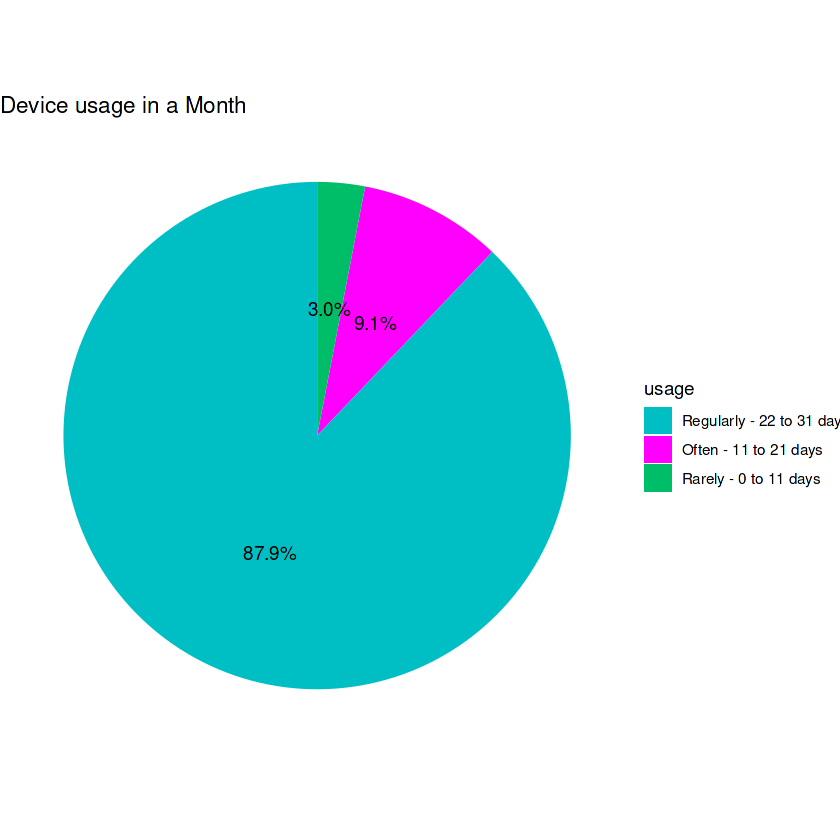

In [12]:
# Visualizing how often users use their devices in a month

plot1 <- ggplot(user_type_percent, aes(x="", y= total_percent, fill = usage))+
  geom_bar(stat = "identity", width = 1)+
  coord_polar("y", start = 0)+
  theme_void()+
  geom_text(aes(label = labels),
            position = position_stack(vjust = 0.5))+
  scale_fill_manual(values = c("#00BFC4","#FF00FF","#00BE67"),
                    labels = c("Regularly - 22 to 31 days",
                               "Often - 11 to 21 days",
                               "Rarely - 0 to 11 days"))+
  labs(title = "Device usage in a Month")

plot1

**Findings:**

Most of the users use their devices regularly in a month but there are a few user that rarely use their devices. This suggests that users who own smart fitness devices will most probably use them on a regular bases.

**2. Time spent in bed vs time spent asleep**

In [13]:

# Calculate the time it takes for users to fall asleep

time_to_sleep <- daily_sleep %>%
  mutate(time_taken = (totaltimeinbed - totalminutesasleep)- 10)

time_to_sleep <- time_to_sleep %>%
  group_by(id) %>%
  summarise(avg_time_taken = mean(time_taken))

In [14]:
# Categorizing users based on amount of minutes it takes to fall asleep

time_to_sleep <- time_to_sleep %>%
  mutate(fel_asleep = case_when(
    avg_time_taken >= 0 & avg_time_taken < 15 ~ "very quickly"
    ,avg_time_taken >= 15 & avg_time_taken < 30 ~ "quickly"
    ,avg_time_taken >= 30 & avg_time_taken < 50 ~ "slowly"
    ,avg_time_taken >= 50 ~ "very slowly"))
time_to_sleep$fel_asleep <- factor(time_to_sleep$fel_asleep, levels = c("very quickly","quickly","slowly","very slowly" ))
time_to_sleep <- drop_na(time_to_sleep)

In [15]:
# Converting to percentages to visualize easier

time_to_sleep_percent <- time_to_sleep %>%
  group_by(fel_asleep) %>%
  summarise(total = n()) %>%
  mutate(totals = sum(total)) %>%
  group_by(fel_asleep) %>%
  summarise(total_percent = total/totals) %>%
  mutate(labels = scales::percent(total_percent))

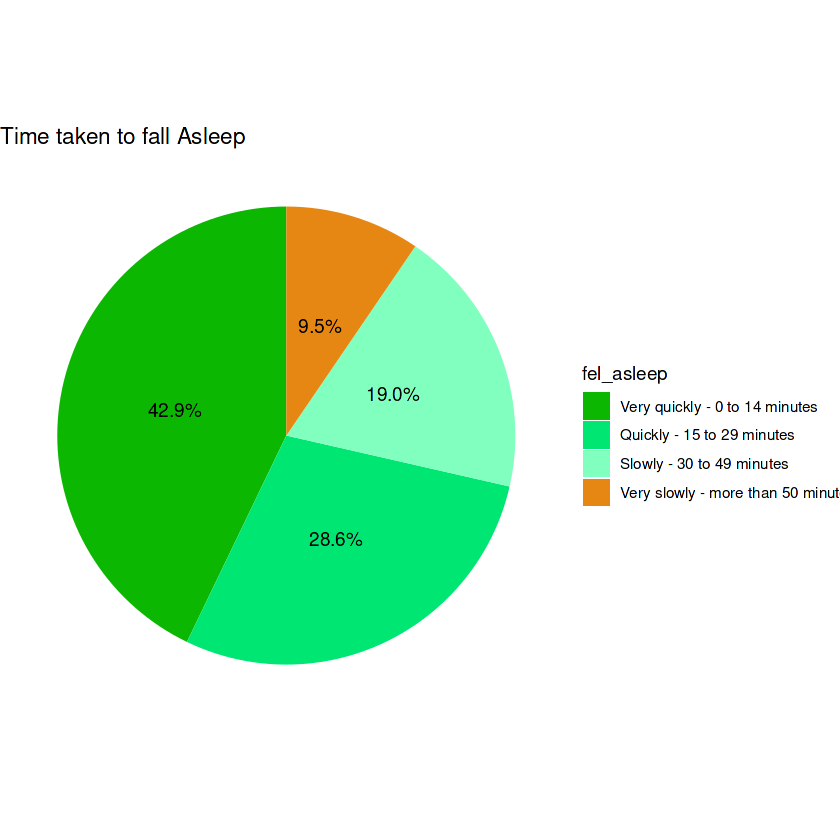

In [16]:
# Visualizing time it takes for users to fall asleep

plot2 <- ggplot(time_to_sleep_percent, aes(x="", y= total_percent, fill = fel_asleep))+
  geom_bar(stat = "identity", width = 1)+
  coord_polar("y", start = 0)+
  theme_void()+
  geom_text(aes(label = labels),
            position = position_stack(vjust = 0.5))+
  scale_fill_manual(values = c("#0CB702","#00e673","#80ffbf", "#E68613"),
                    labels = c("Very quickly - 0 to 14 minutes",
                               "Quickly - 15 to 29 minutes",
                               "Slowly - 30 to 49 minutes",
                               "Very slowly - more than 50 minutes"))+
  labs(title = "Time taken to fall Asleep")

plot2

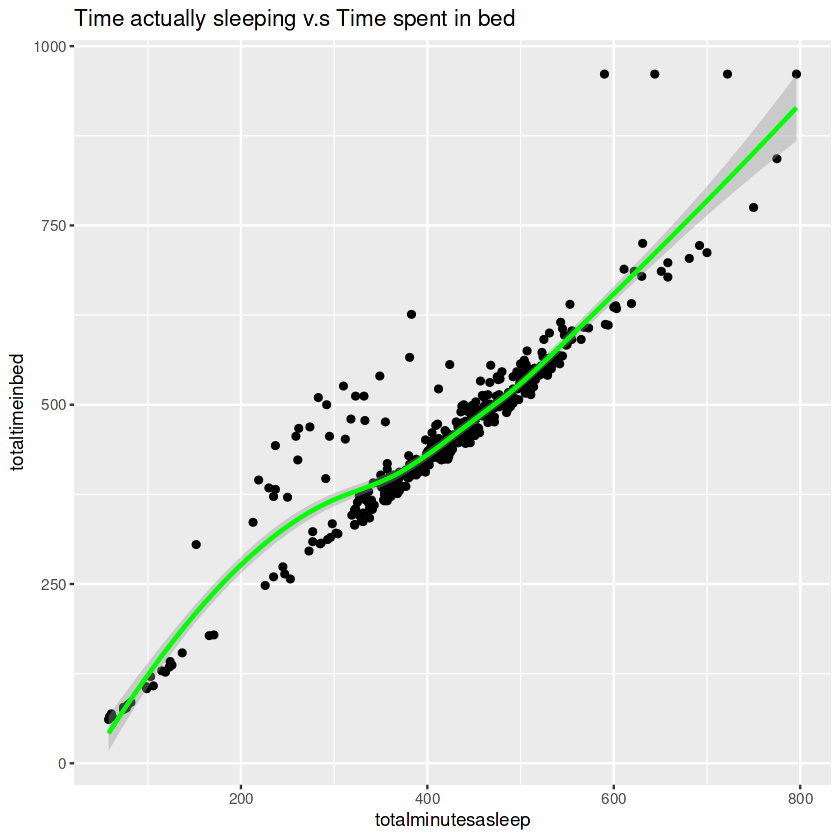

In [17]:
# Visualization of time spent in bed and time sleeping

plot3 <- ggplot(daily_sleep, aes(x = totalminutesasleep, y = totaltimeinbed)) + 
geom_point() + 
geom_smooth(color = "green", method = "loess", formula = "y ~ x") + 
labs(title = "Time actually sleeping v.s Time spent in bed")
plot3

**Findings:**

Most of the users fall asleep quickly after going to bed however there are a small percentage of users that takes a long while to fall asleep.

**3. The relationship between steps and amount of sleep**

In [18]:
# Correlation between Steps walked and amount of sleep

daily_steps_sleep <- daily_activity_sleep %>% 
  group_by(id) %>% 
  summarise(total_steps = sum(totalsteps), total_sleepminutes = sum(totalminutesasleep))

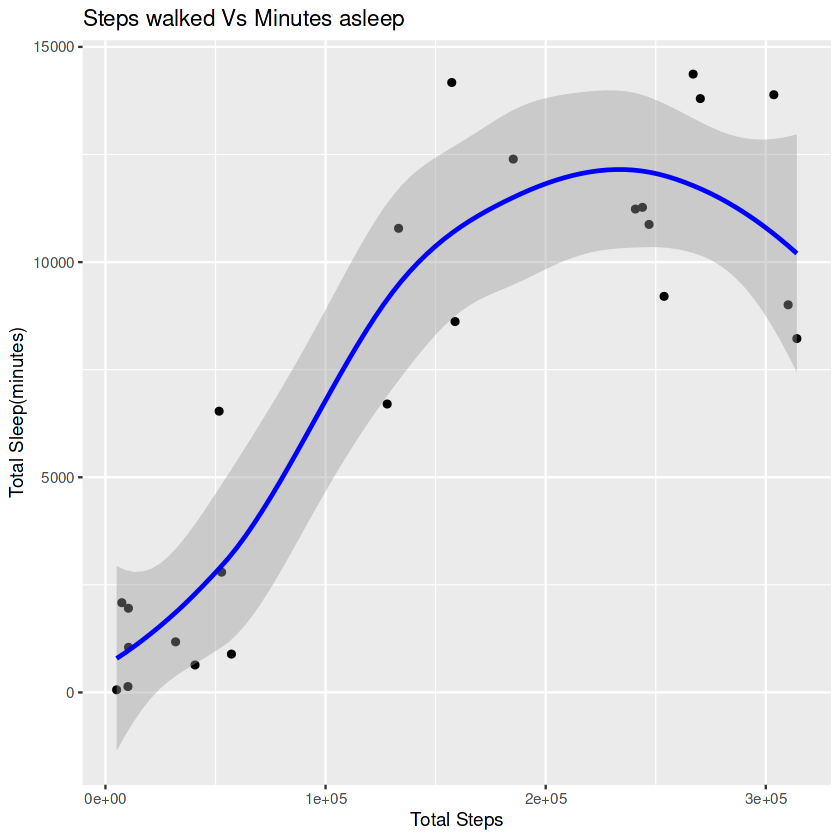

In [19]:
# Visualizing Correlation between steps and sleep

plot4 <- ggplot(daily_steps_sleep, aes(x= total_steps, y= total_sleepminutes))+
  geom_point(fill = "green")+
  geom_smooth(color = "blue", method = "loess", formula = "y ~ x")+
  labs(title = "Steps walked Vs Minutes asleep", x= "Total Steps", y= "Total Sleep(minutes)")

plot4

**Findings:**

There is a positive relationship between the amount of sleep and the number of steps of users. This suggests that taking more steps during the day will lead to better sleep during the night.

**4. On which days of the week are users most active?******



In [20]:
# Which days of the week are users most active

weekday_steps_sleep <- daily_activity_sleep 

weekday_steps_sleep$week_day <- ordered(weekday_steps_sleep$week_day, levels = c("Monday", "Tuesday", "Wednesday", "Thursday",
                                                                                 "Friday", "Saturday", "Sunday"))

weekday_steps_sleep <- weekday_steps_sleep %>%
  group_by(week_day) %>%
  summarise(daily_steps = mean(totalsteps), daily_sleep = mean(totalminutesasleep))

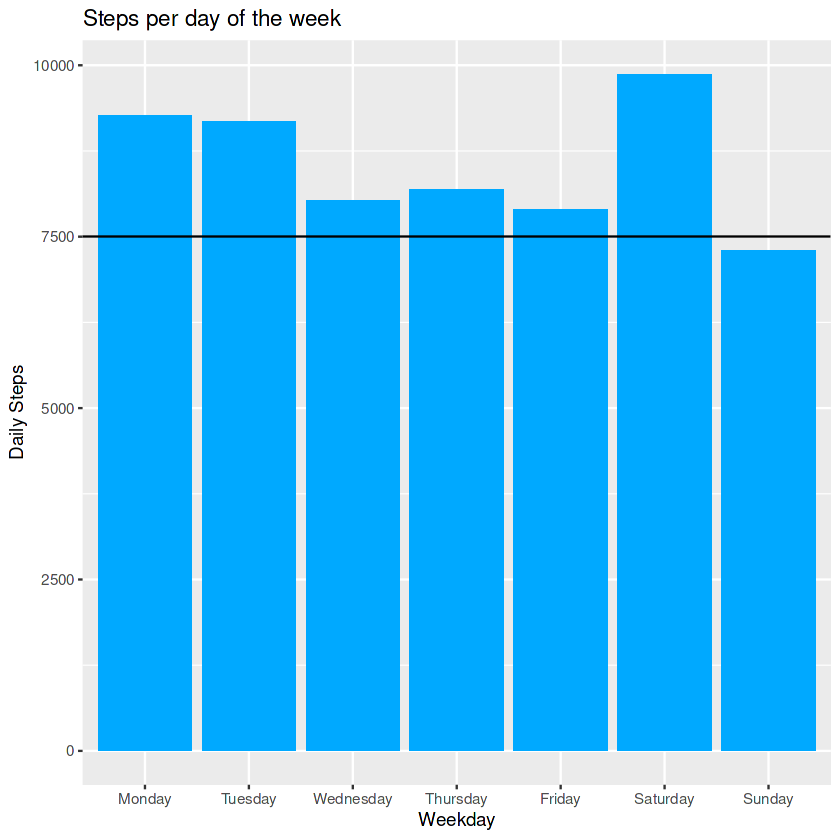

In [21]:
# Visualizing which days of the week users were most active

plot5 <-  ggplot(weekday_steps_sleep) +
  geom_col(mapping = aes(week_day, daily_steps), fill = "#00A9FF")+
  labs(title = "Steps per day of the week", x= "Weekday", y= "Daily Steps")+
  geom_hline(yintercept = 7500)
plot5

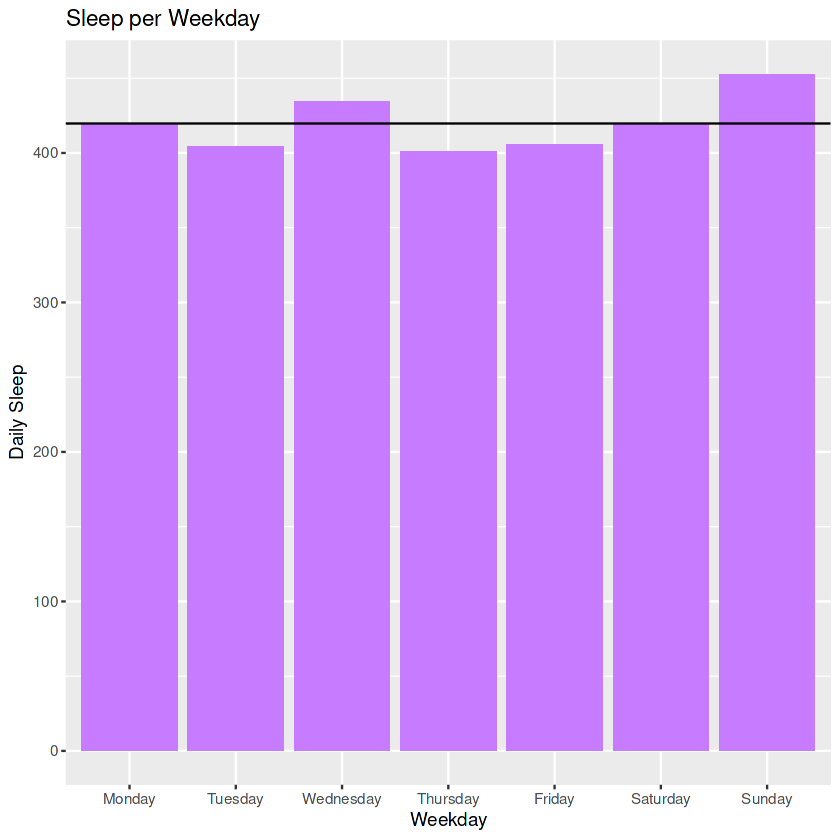

In [22]:
# Visualizing sleep per day of the week

plot6 <-  ggplot(weekday_steps_sleep)+
 geom_col(aes(x= week_day, y= daily_sleep), fill = "#C77CFF")+
 geom_hline(yintercept = 420)+
 labs(title = "Sleep per Weekday", x= "Weekday", y= "Daily Sleep")

plot6

**Findings:**

Users are most active on Saturdays while they are least active on Sundays. Users normally reach the recommended 7500 steps every day except on Sundays.

**5. What is the correlation between steps and calories?**

In [23]:
# Correlation between steps and calories

daily_steps_calories <- daily_activity %>% 
  group_by(id) %>% 
  summarise(total_steps = sum(totalsteps), total_calories = sum(calories))

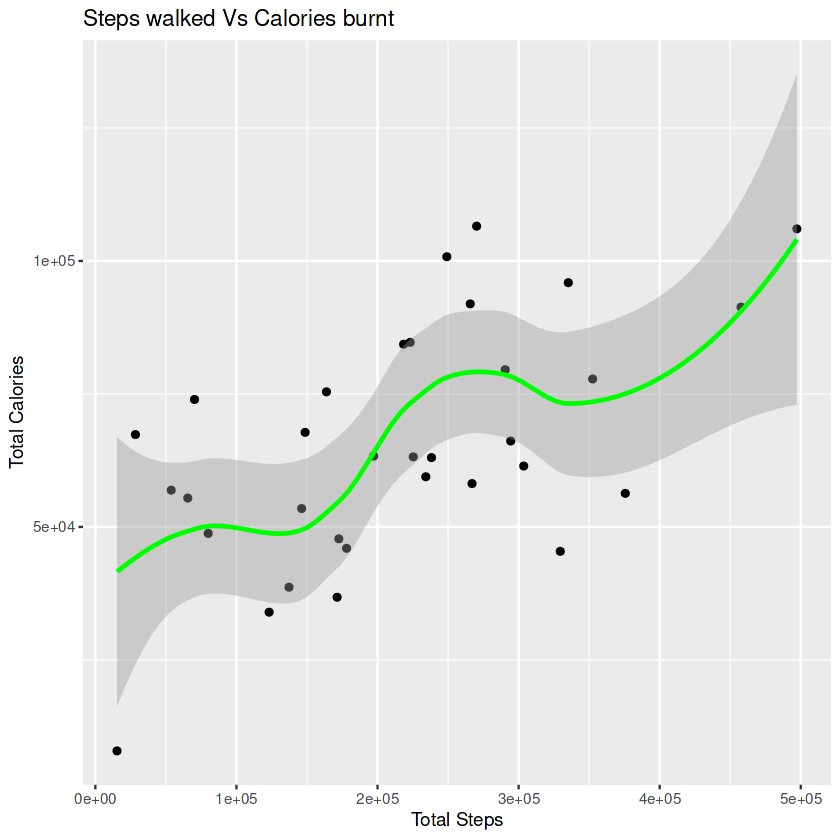

In [24]:
# Visualization of the correlation between steps and calories

plot7 <- ggplot(daily_steps_calories, aes(x= total_steps, y= total_calories), fill = blue)+
  geom_point()+
  geom_smooth(color = "green", method = "loess", formula = "y ~ x")+
  labs(title = "Steps walked Vs Calories burnt", x= "Total Steps", y= "Total Calories")

plot7

**Findings:**

There is a positive correlation between steps taken and calories burned. This suggests that taking more steps will ultimately burn more calories.

**6. Which times of the day are users most active?**

In [25]:
# Calculate which time of day users are most active by separating date and time

hourly_steps <- hourly_steps %>%
  separate(date_time, into = c("date", "time"), sep= " ") %>%
  mutate(date = ymd(date))

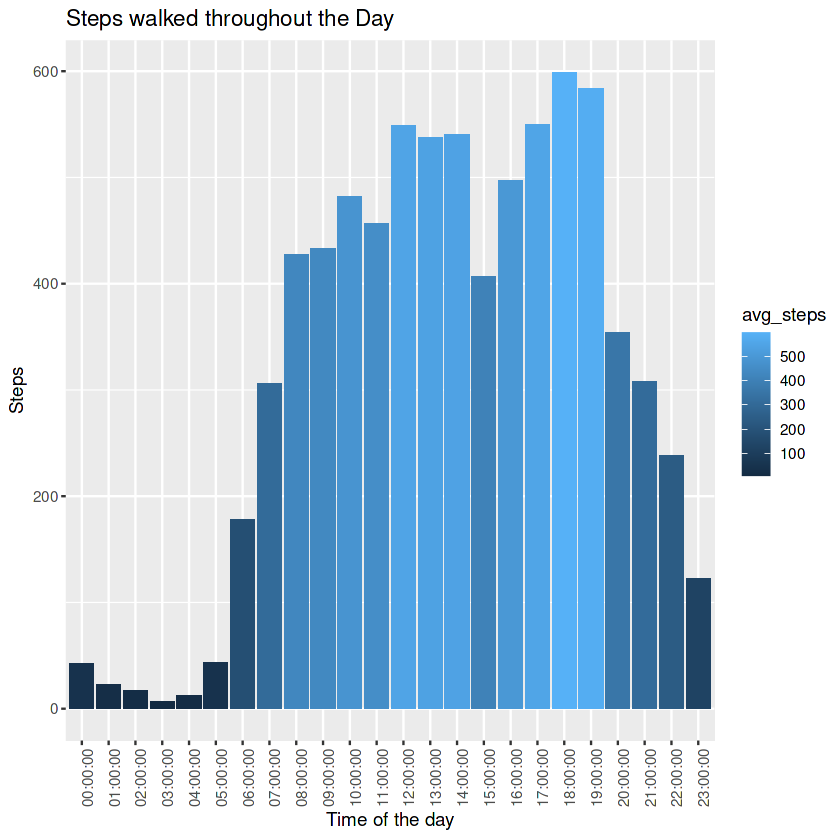

In [26]:
# Visualizing what time of day users are most active

plot8 <- hourly_steps %>%
  group_by(time) %>%
  summarise(avg_steps = mean(steptotal)) %>%
  ggplot(aes(x= time, y= avg_steps, fill = avg_steps))+
  geom_col()+
  labs(title = "Steps walked throughout the Day", x= 'Time of the day', y= "Steps")+
  theme(axis.text.x = element_text(angle = 90))

plot8

**Findings:**

Users are most active in the evening (17:00 - 19:00) and second most in the afternoon (12:00 – 14:00).

User activity declines during the night from 22:00 to 05:00

**Share**

**Recommendations:**

* We can see that walking more steps gets you more sleep so we can recommend to our users who are having difficulties with sleep to walk more or be more active during the day time in order to get more sleep at night.

* Users are not getting the recommended 7 hours of sleep every night and an App notification at a specified bedtime might help improve the sleeping patterns of users.

* Since users do not reach the recommended numbers of steps on Sundays, we can send them notifications on Bellabeat App to complete their daily steps goal. This will motivate users and build loyalty.

* Some users are struggling to fall asleep after getting into bed, so we can publish some articles (best sleeping habits, how to improve sleep quality etc) on our website and App which may help them get the recommended sleep.

* Walking more steps burns more calories, so we can add a new feature to our app which sets a goal for the day based on your fitness goals and if the goal is not met it sends notifications to our users to complete their goal, which may help improve their fitness.